# 1 支持向量
在本练习中，我们将使用高斯核函数的支持向量机（SVM）来构建垃圾邮件分类器。 

## 1.1 数据集1
先在2D数据集上实验

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [4]:
raw_data = loadmat('E:\机器学习(吴恩达)\ML数据\ml_ex6\ex6data1.mat')
data = pd.DataFrame(raw_data.get('X'), columns=['X1', 'X2'])
data['y'] = raw_data.get('y')

data.head()

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


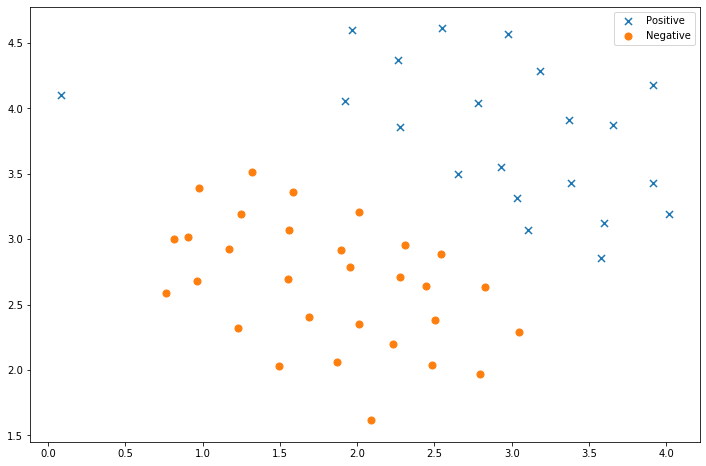

In [5]:
# 数据可视化

def plot_init_data(data, fig, ax):
    positive = data[data['y'].isin([1])]
    negative = data[data['y'].isin([0])]

    ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
    ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')

fig, ax = plt.subplots(figsize=(12,8))
plot_init_data(data, fig, ax)
ax.legend()
plt.show()

In [6]:
# 令C = 1

from sklearn import svm
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [7]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

E:\Program Files\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9803921568627451

In [8]:
# 可视化分类边界

def find_decision_boundary(svc, x1min, x1max, x2min, x2max, diff):
    x1 = np.linspace(x1min, x1max, 1000)
    x2 = np.linspace(x2min, x2max, 1000)

    cordinates = [(x, y) for x in x1 for y in x2]
    x_cord, y_cord = zip(*cordinates)
    c_val = pd.DataFrame({'x1':x_cord, 'x2':y_cord})
    c_val['cval'] = svc.decision_function(c_val[['x1', 'x2']])

    decision = c_val[np.abs(c_val['cval']) < diff]
    
    return decision.x1, decision.x2

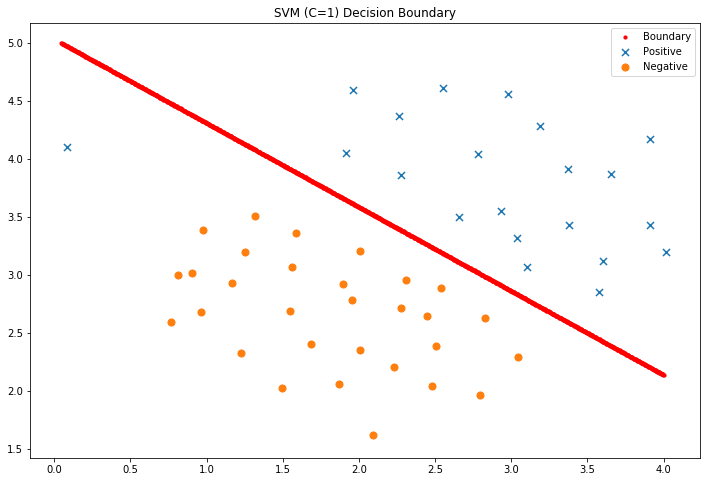

In [9]:
x1, x2 = find_decision_boundary(svc, 0, 4, 1.5, 5, 2 * 10**-3)
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x1, x2, s=10, c='r',label='Boundary')
plot_init_data(data, fig, ax)
ax.set_title('SVM (C=1) Decision Boundary')
ax.legend()
plt.show()

In [10]:
# 令C = 100

svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])

E:\Program Files\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9215686274509803

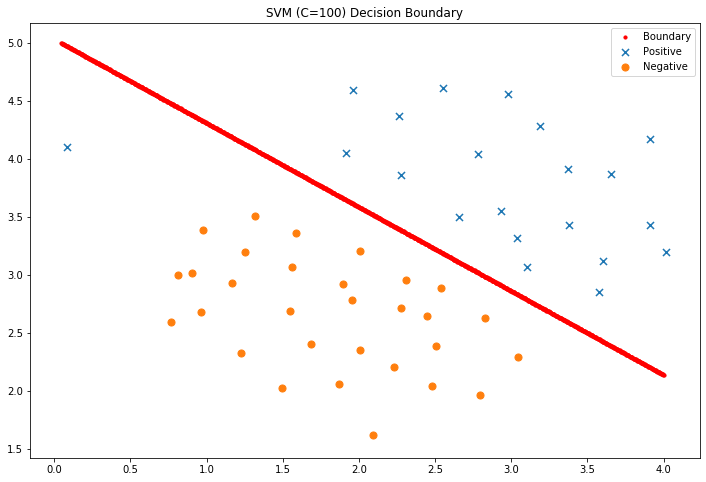

In [11]:
x1, x2 = find_decision_boundary(svc, 0, 4, 1.5, 5, 2 * 10**-3)
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x1, x2, s=10, c='r',label='Boundary')
plot_init_data(data, fig, ax)
ax.set_title('SVM (C=100) Decision Boundary')
ax.legend()
plt.show()

